<a href="https://colab.research.google.com/github/KomangHari/komanghari/blob/main/german_credit_topikzulkarnain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Practice Case Clustering
Topik Zulkarnain

#### Introduction
Pada case ini, akan dilakukan teknik clustering untuk mensegmentasi kostumer pada data german_credit_data. Tujuan dari practice ini adalah untuk mengelompokkan kostumer berdasarkan pola perilakunya dalam 3 kategori resiko yaitu good, medium dan bad.

## Loading data Set

In [3]:
#LOAD DATASET AND ALL MODULES
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/csv file/german_credit_data.csv")

## Exploratory Data Analysis


In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


#### Berikut adalah deskripsi dari data
* Unnamed : 0 = data yang tidak diperlukan akan didrop
* Age = Usia dari kostumer
* Sex = Jenis kelamin dari kostumer
* Job = Jenis pekerjaannya
* Housing = Status tempat tinggal
* Saving Account = 
* Checking Account = 
* Credit Amount = Jumlah kredit
* Duration = Lama durasi pengkreditan
* Purpose = Tujuan pengkreditan

terdapat missing value dalam dataset dengan feature saving account sebanyak 18.3%, dan checking accounts sebesar 39.4%. Maka akan digunakan statistika deskriptif untuk mengisi missing valuenya

In [5]:
percentage_missing_value = (data.isnull().sum())/(len(data)) * 100
percentage_missing_value

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [6]:
categorical_missing = ['Saving accounts', 'Checking account']
for x in categorical_missing :
    data[x] = data[x].fillna(data[x].mode().values[0])

In [7]:
data = data.drop(columns = ['Unnamed: 0'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


data sudah siap untuk 

## Data Visualization
Akan dilakukan visualisai data untuk mendapatkan insight dari pola data 

In [9]:
data.head()
data['Job'] = data['Job']+1 #menghindari infinity value ketika transformasi data

In [10]:
data_numerik = ['Age', 'Credit amount', 'Duration', 'Job']
data_kategorik = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,3,own,little,little,1169,6,radio/TV
1,22,female,3,own,little,moderate,5951,48,radio/TV
2,49,male,2,own,little,little,2096,12,education
3,45,male,3,free,little,little,7882,42,furniture/equipment
4,53,male,3,free,little,little,4870,24,car


In [11]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,2.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,1.000000,250.000000,4.000000
25%,27.000000,3.000000,1365.500000,12.000000
50%,33.000000,3.000000,2319.500000,18.000000
75%,42.000000,3.000000,3972.250000,24.000000
max,75.000000,4.000000,18424.000000,72.000000


Dari summary data didapatkan bahwa rataan umur kustomer adalah 35 tahun, jenis pekerjaannya adalah tipe 3, kredit yang dipinjam sebesar 3271, dan durasi peminjaman 21 hari.

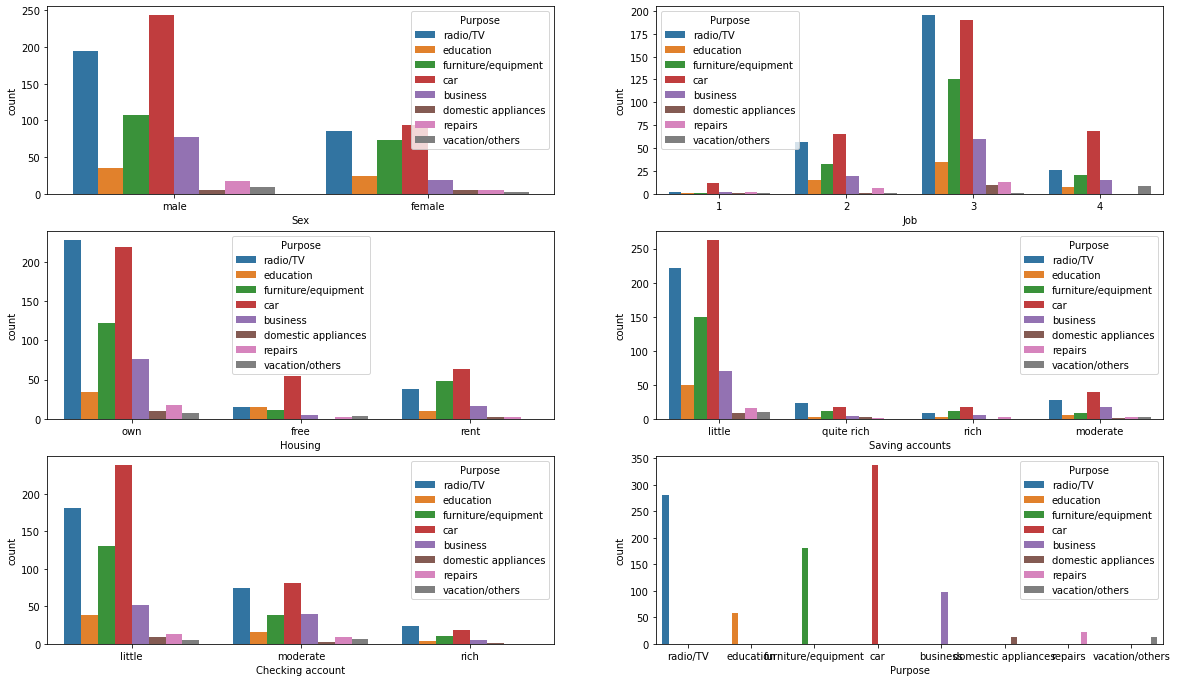

In [12]:
fig = plt.figure(figsize = (20,20))
axes = 520
for cat in data_kategorik:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = data, x = cat, hue ='Purpose')
plt.show()

#### Business Insight : Rekomendasi Tawaran Kredit Kepada Kostumer
Berdasakan grafik beberapa feature terhadap tujuan pengkreditan maka dapat dibentuk suatu startegi tawaran yang dapat berupa suatu iklan atau promo terhadap kostumer dengan kriteria tertentu sebagai berikut :
* Rekomendasi Kredit Car untuk kostumer dengan kriteria :
    - Bergender pria 
    - Memiliki job tipe 2
    - Memiliki rumah sendiri
    - Memiliki kategori saving accounts little
    - Memiliki kategori checking accounts little
* Rekomendasi kredit radio/TV
    - Bergender pria 
    - Memiliki job tipe 2
    - Memiliki rumah sendiri
    - Memiliki kategori saving accounts little
    - Memiliki kategori checking accounts little
***

#### Visualisasi Lama Durasi Peminjaman berdasarkan kriteria Kostumer

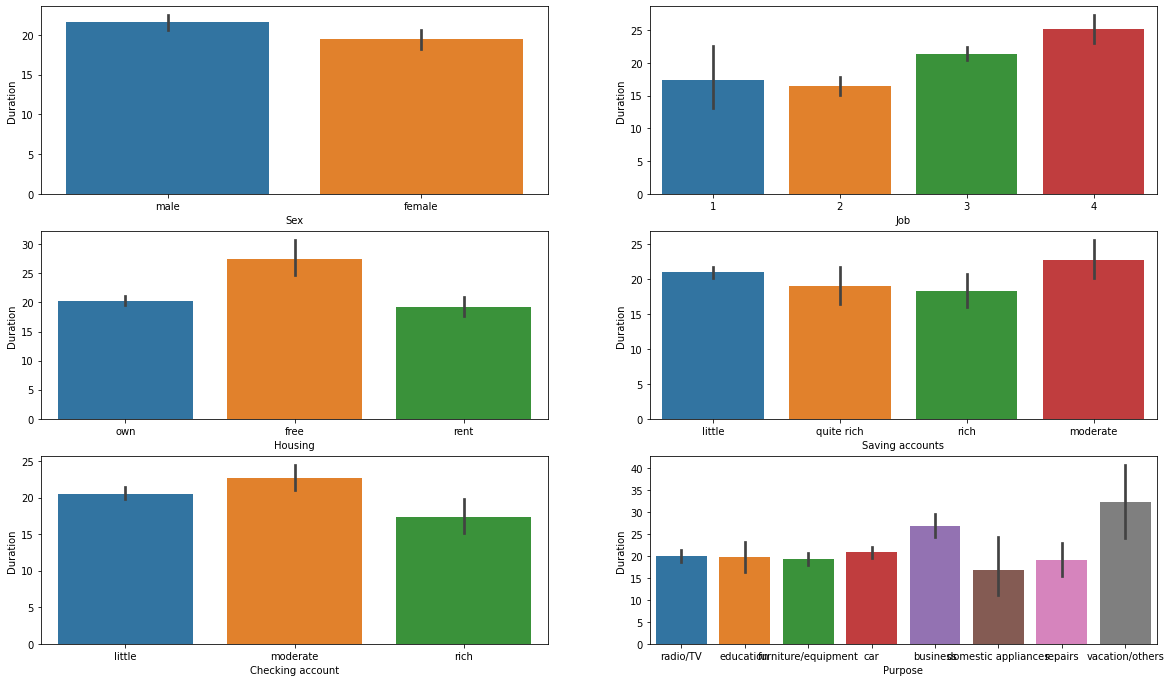

In [13]:
fig = plt.figure(figsize = (20,20))
axes = 520
for cat in data_kategorik:
    axes += 1
    fig.add_subplot(axes)
    sns.barplot(data = data, x = cat, y ='Duration')
plt.show()

#### Business Insight : Resiko lama durasi peminjaman kredit
Berdasarkan visualisasi data berdasarkan durasi peminjaman tiap kriteria, dapat dilihat bahwa kriteria yang beresiko lama peminjamannya adalah :
* Pria lebih lama dibanding perempuan
* Jenis pekerjaan 3 lebih lama daripada jenis pekerjaan lain
* orang yang status kepemilikan rumahnya free lebih lama dari yang lain
* Saving dan Check account moderate cenderung lebih lama durasi peminjamannya
* Tujuan pengkreditan yang paling lama durasinya adalah untuk Vacation lalu untuk bisnis

## Clustering Kustomer
Pada kasus clustering pada permasalahan ini akan digunakan feature yang paling berpengaruh diantaranya adalah jenis pekerjaan, jumlah pengkreditan, usia, dan durasi peminjaman 

In [14]:
data_cluster = data[['Age', 'Credit amount', 'Duration']]
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,3,own,little,little,1169,6,radio/TV
1,22,female,3,own,little,moderate,5951,48,radio/TV
2,49,male,2,own,little,little,2096,12,education
3,45,male,3,free,little,little,7882,42,furniture/equipment
4,53,male,3,free,little,little,4870,24,car


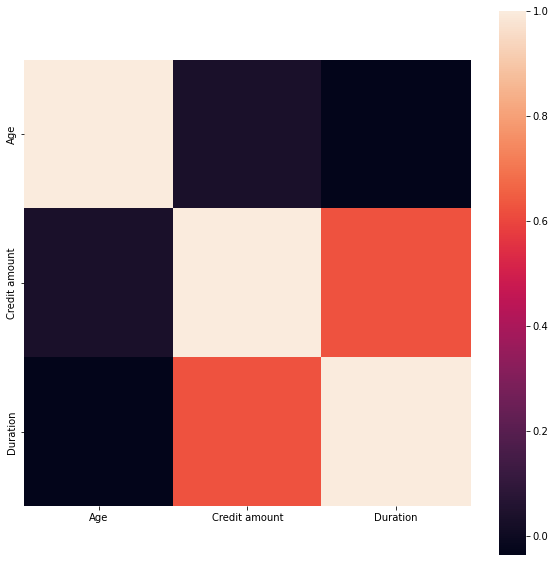

In [15]:
import seaborn as sns
cor = data_cluster.corr() #Calculate the correlation of the above variables
plt.figure(figsize=(10,10))
sns.heatmap(cor, square = True) #Plot the correlation as heat map

#### Melihat sebaran data
Akan dilakukan visualisai penyebaran data sebelum dilakukan teknik clustering

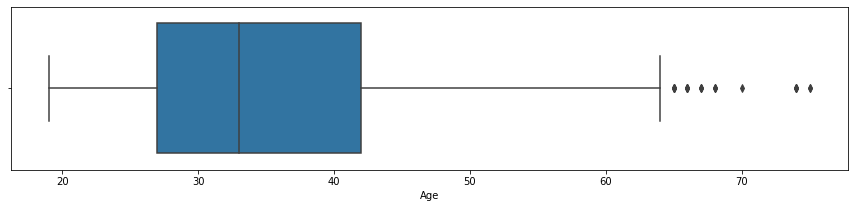

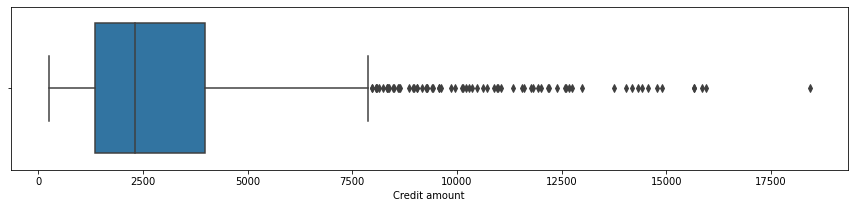

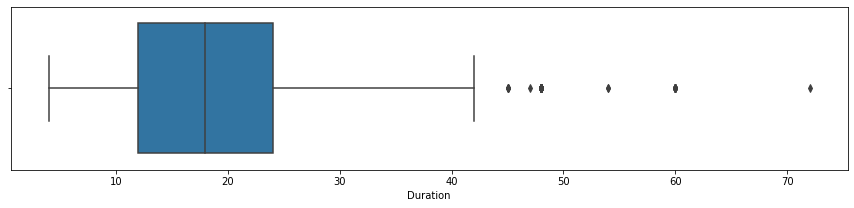

In [16]:
plt.figure(figsize=(15,3))
sns.boxplot(x = data_cluster['Age'])
plt.show()
plt.figure(figsize=(15,3))
sns.boxplot(x = data_cluster['Credit amount'])
plt.show()
plt.figure(figsize=(15,3))
sns.boxplot(x = data_cluster['Duration'])
plt.show()

## Algoritma K-Means

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

In [18]:
#Data diberlakukan tranformasi logaritmik agar variansi data lebih masuk kedalam range
cluster_credit_duration = np.log(data_cluster[['Age','Credit amount', 'Duration']])
cluster_credit_duration.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [19]:
X = np.array(cluster_credit_duration)

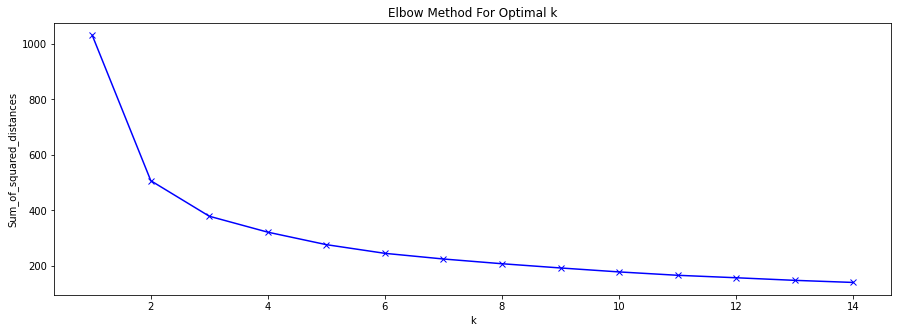

In [20]:
#Scree Plot untuk menentukan nilai K
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize = (15,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

pada scree plot dapat dilihat bahwa K yang optimal berada pada 3 atau 4. Pada kasus ini akan dipilih K=3, yaitu cluster yang baik, sedang, dan buruk.

In [21]:
#mengaktifkan algoritma k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [22]:
print(kmeans.cluster_centers_)

[[3.54224135 8.77819318 3.47944517]
 [3.50402006 7.79774155 2.93193607]
 [3.53609531 6.9915667  2.32831891]]


In [23]:
print(np.exp(kmeans.cluster_centers_))

[[  34.5442583  6491.13827372   32.44171743]
 [  33.24884593 2435.09621914   18.76392371]
 [  34.33259909 1087.4238082    10.26067788]]


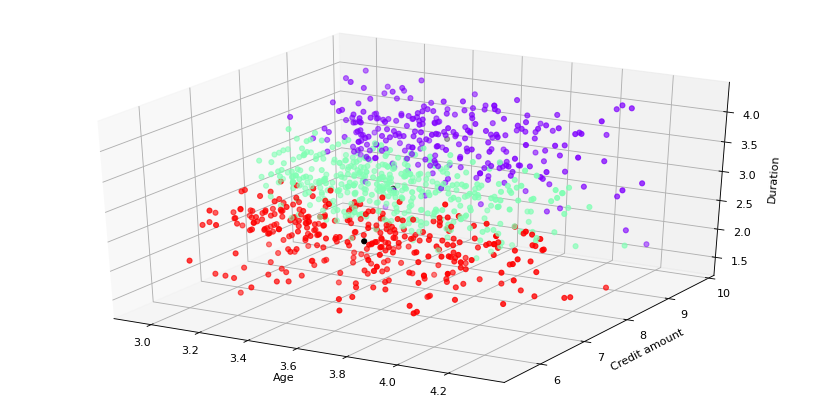

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num = None, figsize = (10,5), dpi = 80, facecolor = 'w', edgecolor ='k')
ax = Axes3D(fig)
ax.scatter3D(X[:,0], X[:,1], X[:,2], c = kmeans.labels_, cmap = 'rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black')

xLabel = ax.set_xlabel('Age', linespacing = 3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing = 1.2)
zLabel = ax.set_zlabel('Duration', linespacing = 1.5)

Berdasarkan dari plot 3D terlihat data telah di kelompokkan menjadi 3 yaitu cluster 0, 1 dan 2. Ciri cluster 0 adalah yang rataan customernya berumur sekitar 33 tahun, jumlah kreditnya 2435 dengan durasi peminjaman selama 18 hari. Ciri cluster 1 adalah yang rataan customernya berumur sekitar 35 tahun, jumlah kreditnya 6491 dengan durasi peminjaman selama 32 hari. Ciri cluster 2 adalah yang rataan customernya berumur sektiar 34 tahun, jumlah kreditnya 1087 dengan durasi peminjaman selama 10 hari. Berikut adalah pendefinisian cluster:
* Cluster 0 : Good Credit Risk
* Cluster 1 : Medium Credit Risk
* Cluster 2 : Bad Credit Risk    

In [25]:
print(kmeans.labels_)

[2 0 1 0 0 0 1 0 1 0 2 0 2 1 2 1 1 0 0 1 2 2 1 2 1 2 2 2 2 0 1 1 0 2 2 0 0
 1 2 2 1 2 0 0 0 2 1 2 0 1 1 0 2 1 1 2 0 0 1 0 2 2 1 0 1 0 1 2 1 1 0 2 2 0
 1 2 0 1 0 0 0 2 1 1 1 2 2 0 1 2 2 2 2 1 2 0 1 1 1 0 1 1 2 2 1 0 0 0 0 2 2
 2 0 0 2 0 0 1 0 1 1 1 2 2 1 1 2 2 1 1 0 0 1 1 0 2 0 2 1 1 2 0 1 1 1 0 2 2
 0 1 2 2 0 0 0 2 2 2 1 2 1 2 2 0 1 2 2 2 1 1 2 2 1 2 1 0 1 2 1 2 0 0 1 1 2
 2 1 2 2 1 0 0 0 2 0 2 2 2 1 1 2 2 0 2 2 0 1 2 0 2 1 0 0 1 0 2 1 0 1 2 2 2
 2 1 1 1 0 0 2 1 0 1 1 2 2 1 0 1 2 1 2 2 0 2 1 1 2 2 1 2 2 1 1 0 2 0 1 1 1
 2 2 1 0 1 2 2 0 1 0 2 1 2 0 0 0 1 1 2 1 1 1 2 1 2 1 0 0 0 2 2 2 0 0 0 0 0
 1 2 1 1 2 0 1 2 0 2 0 2 2 2 0 0 1 2 2 1 2 0 2 1 0 1 1 1 2 1 1 1 0 2 0 1 0
 0 0 1 1 2 0 2 0 1 1 1 1 2 2 1 2 2 2 2 1 0 2 1 1 0 2 1 2 1 1 2 1 2 1 1 0 1
 1 0 1 0 0 0 1 2 0 2 1 0 1 2 0 1 2 0 1 2 1 2 0 2 1 0 1 1 2 1 1 1 0 2 1 1 1
 2 1 2 1 0 1 2 1 0 1 0 1 2 1 1 2 1 1 1 1 2 2 2 2 0 2 1 2 2 2 1 0 2 1 2 1 2
 0 2 1 2 2 2 0 2 1 1 0 1 1 1 2 1 0 1 1 2 1 1 1 0 1 0 1 2 2 2 2 1 1 0 2 2 1
 1 0 2 2 2 1 1 2 1 1 0 2 

In [26]:
data['Cluster (K-Means)'] = kmeans.labels_

In [27]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means)
0,67,male,3,own,little,little,1169,6,radio/TV,2
1,22,female,3,own,little,moderate,5951,48,radio/TV,0
2,49,male,2,own,little,little,2096,12,education,1
3,45,male,3,free,little,little,7882,42,furniture/equipment,0
4,53,male,3,free,little,little,4870,24,car,0


In [28]:
#arr = []
#for i in range(len(data['Cluster (K-Means)'])):
#    if data['Cluster (K-Means)'][i] == 0:
#        arr.append('Good Credit')
#    elif data['Cluster (K-Means)'][i] == 1:
#        arr.append('Medium Credit')
#    else :
#        arr.append('Bad Credit')
#data['Cluster (K-Means)']=arr

In [29]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means)
0,67,male,3,own,little,little,1169,6,radio/TV,2
1,22,female,3,own,little,moderate,5951,48,radio/TV,0
2,49,male,2,own,little,little,2096,12,education,1
3,45,male,3,free,little,little,7882,42,furniture/equipment,0
4,53,male,3,free,little,little,4870,24,car,0


In [30]:
#Membuat feature pembayaran kredit per waktu, dibuat untuk memvalidasi cluster. 
# Cluster 0 adalah cluster good credit yang berarti jumlah kredit banyak namun durasi pembayaran sebentar.
data['Pay/Time'] = data['Credit amount'] / data['Duration']

In [31]:
data.sort_values(by = ['Pay/Time'], ascending = False).head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means),Pay/Time
917,68,male,4,own,little,little,14896,6,car,0,2482.666667
236,23,male,1,own,little,moderate,14555,6,car,0,2425.833333
738,45,male,4,own,little,little,6761,6,car,1,1126.833333
734,37,female,3,own,little,little,3380,4,car,2,845.000000
693,44,male,2,own,little,little,4716,6,car,1,786.000000
278,32,female,3,own,little,little,4611,6,furniture/equipment,1,768.500000
163,70,male,4,free,little,moderate,7308,10,car,0,730.800000
381,38,female,4,free,little,moderate,12976,18,car,0,720.888889
430,74,male,2,own,little,little,3448,5,business,2,689.600000
48,39,male,2,own,little,little,7228,11,car,0,657.090909


In [32]:
data.sort_values(by = ['Pay/Time'], ascending = True).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means),Pay/Time
249,22,female,3,rent,little,little,433,18,radio/TV,2,24.055556
164,36,male,3,own,quite rich,little,909,36,car,1,25.250000
111,23,female,3,rent,little,rich,392,15,education,2,26.133333
179,65,male,3,own,little,little,571,21,car,2,27.190476
157,45,male,2,own,little,little,339,12,education,2,28.250000


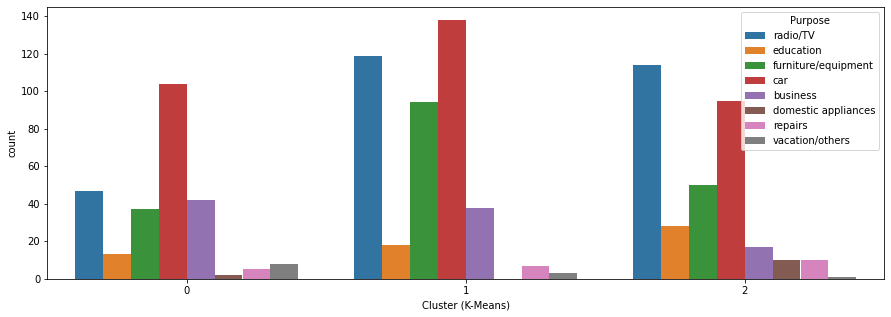

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='Cluster (K-Means)', hue='Purpose')

Berdasarkan plot diatas dapat disimpulkan bahwa tujuan kredit yang bagus risikonya (cluster 0) urutannya adalah :
1. Car
2. Radio/TV
3. Furniture / Equipment
4. Education
5. Repairs
6. Vacation / others

Tujuan kredit yang sedang resikonya  (cluster 1) urutannya adalah :

1. Car
2. Radio/TV
3. Business
4. Furniture/Equipment
5. Education
6. Vacation/others
7. Repairs
8. Domestic Appliances

Tuujuan kredit yang besar resikonya (cluster 2) urutanya adalah :
1. Radio/Tv
2. Car
3. Education
4. Business
5. Domestic Appliances
6. Repairs
7. Vacation

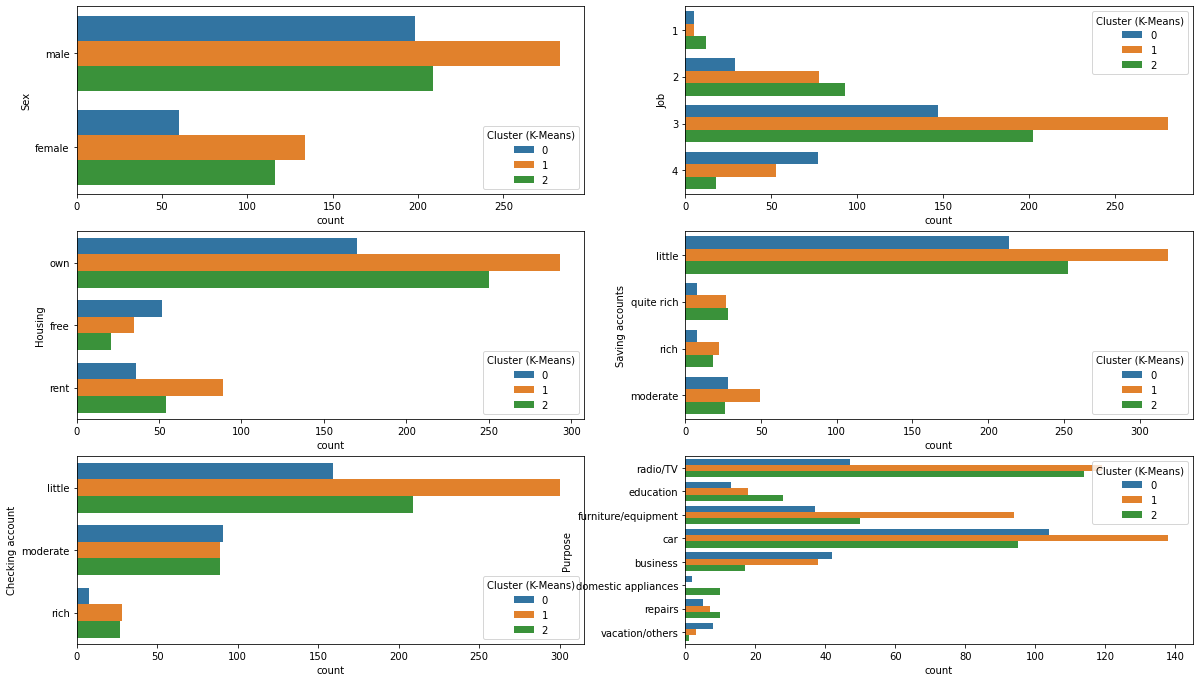

In [34]:
fig = plt.figure(figsize = (20,20))
axes = 520
for cat in data_kategorik:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = data, y = cat, hue ='Cluster (K-Means)')
plt.show()

## Hierarchical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_


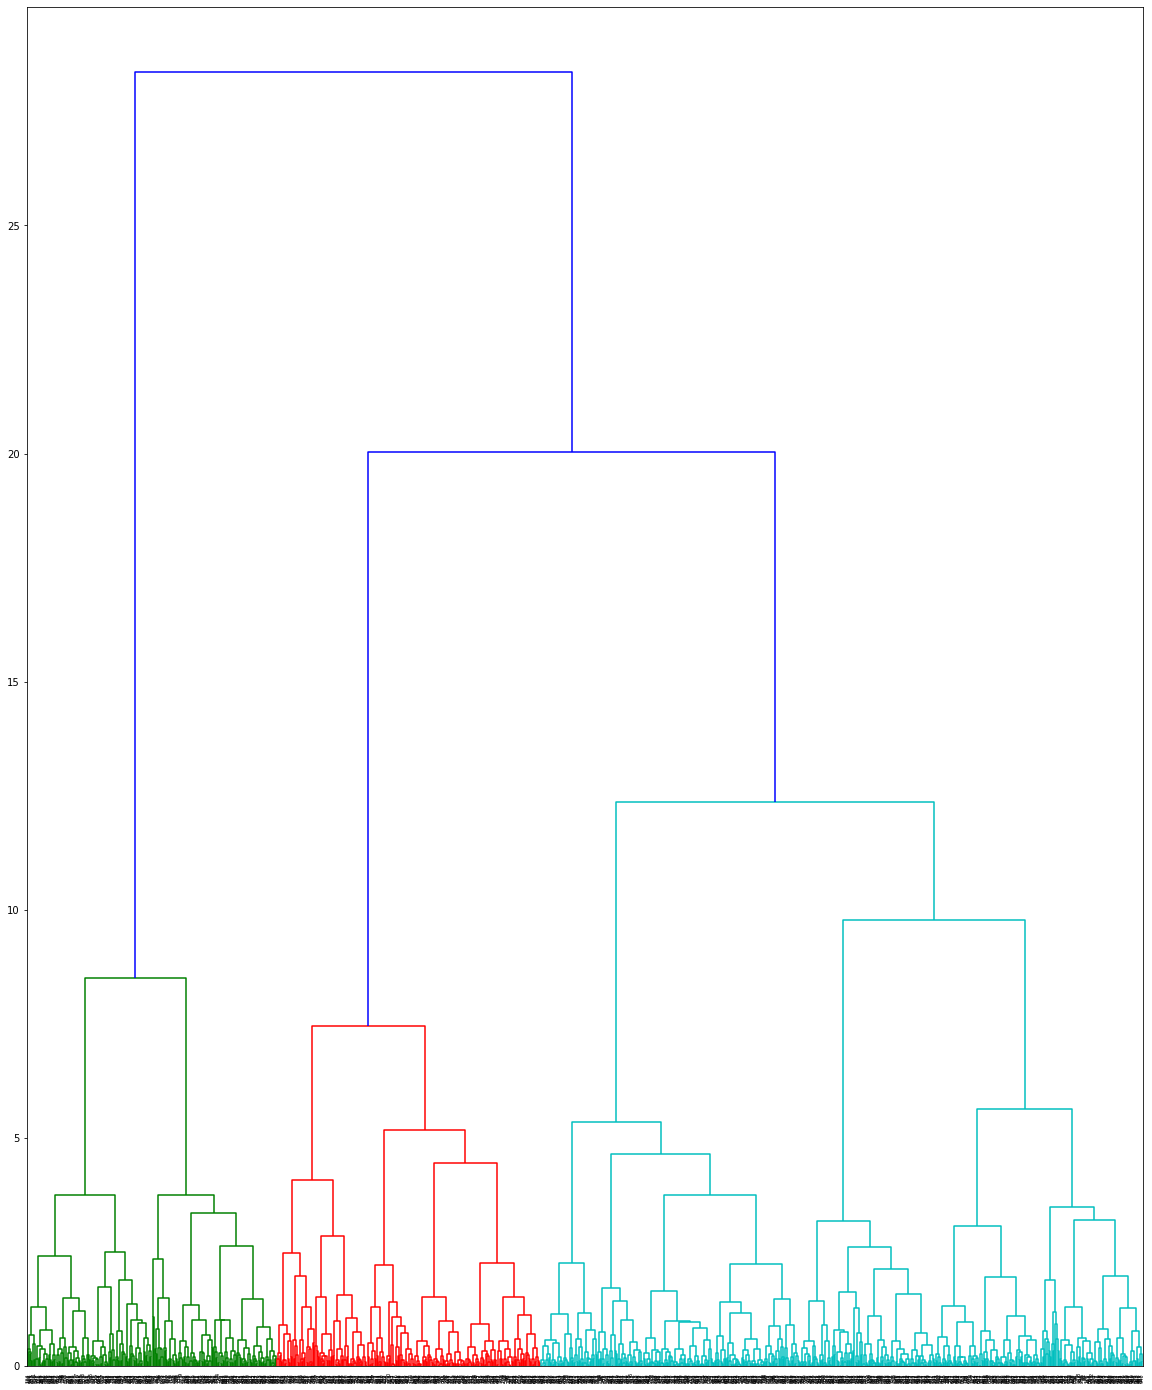

In [36]:
plt.figure(figsize = (20,25))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

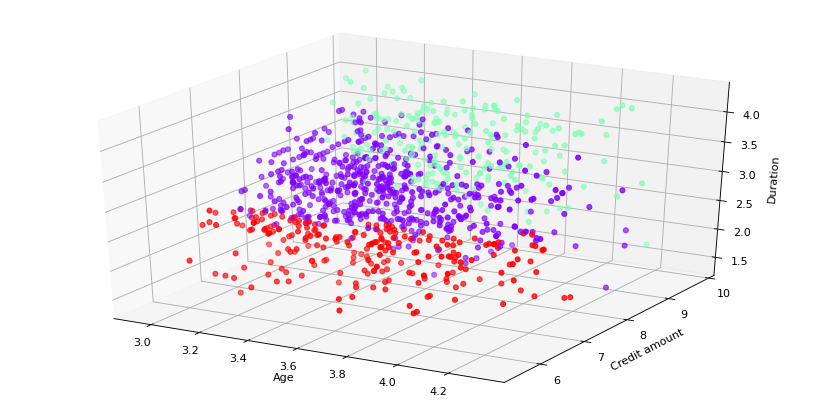

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(num = None, figsize = (10,5), dpi = 80, facecolor = 'w', edgecolor ='k')
#ax = plt.axes(prohection='3d')
ax = Axes3D(fig)
ax.scatter3D(X[:,0], X[:,1], X[:,2], c = labels, cmap = 'rainbow')
#ax.scatter3D(labels.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black')

xLabel = ax.set_xlabel('Age', linespacing = 3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing = 1.2)
zLabel = ax.set_zlabel('Duration', linespacing = 1.5)

In [38]:
print(labels)

[2 1 0 1 1 1 0 1 0 1 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 2 2 0 1 0 0 1 2 2 0 1
 0 2 2 0 2 1 1 1 2 0 2 1 0 0 1 2 0 0 2 1 1 0 1 2 0 0 1 0 1 0 2 0 0 1 2 2 1
 0 2 0 1 1 0 1 0 0 0 0 0 0 1 0 2 2 2 2 0 2 1 0 0 0 1 0 0 2 0 0 1 1 1 1 0 2
 2 1 1 2 0 1 0 0 0 0 1 0 2 0 0 2 2 0 0 1 1 0 0 1 2 1 2 0 0 2 0 0 0 0 0 2 2
 1 0 2 0 1 1 1 2 2 2 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 0 2 0 0 1 0 0 1 0
 0 0 0 2 0 1 0 1 2 0 2 2 2 0 1 2 2 1 2 2 1 0 0 1 2 0 0 1 0 0 2 0 0 0 2 2 2
 2 0 1 0 1 1 2 0 0 0 0 0 2 0 1 0 2 0 0 2 0 2 0 0 2 2 0 2 2 0 0 1 0 1 0 0 0
 2 0 0 1 0 2 0 1 0 1 0 0 2 1 0 1 0 0 2 0 0 0 2 0 2 1 1 0 1 2 0 2 1 1 1 1 1
 0 2 0 0 2 0 0 2 1 2 1 2 2 2 1 1 0 2 2 0 2 1 2 0 0 0 0 0 0 0 1 0 0 2 1 0 1
 1 0 0 0 0 0 2 1 0 0 1 0 0 2 0 2 2 2 2 0 1 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0
 0 1 0 1 1 1 0 2 1 2 0 1 0 0 0 0 0 1 0 2 0 2 0 2 0 1 0 0 2 0 0 0 1 2 0 0 0
 0 0 2 0 1 0 2 0 1 0 1 0 0 0 0 2 0 0 0 0 0 2 0 0 1 2 0 0 0 2 0 0 2 0 0 0 2
 0 2 0 0 2 2 1 2 0 0 1 0 0 0 2 1 0 0 0 2 0 0 0 1 0 1 0 2 2 2 0 0 0 1 2 0 0
 0 0 0 2 2 0 0 2 0 0 1 2 

Hasil clustering dari Hierarchical Clustering dengan K=3 memiliki kelompok yang cukup mirip dengan K-Means hanya saja cluster kredit dengan medium risk lebih banyak sehingga cluster good dan bad menjadi lebih sedikit dibanding K-Means

In [39]:
data['Cluster (Hierarchical)'] = labels

In [40]:
data.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means),Pay/Time,Cluster (Hierarchical)
0,67,male,3,own,little,little,1169,6,radio/TV,2,194.833333,2
1,22,female,3,own,little,moderate,5951,48,radio/TV,0,123.979167,1
2,49,male,2,own,little,little,2096,12,education,1,174.666667,0
3,45,male,3,free,little,little,7882,42,furniture/equipment,0,187.666667,1
4,53,male,3,free,little,little,4870,24,car,0,202.916667,1
5,35,male,2,free,little,little,9055,36,education,0,251.527778,1
6,53,male,3,own,quite rich,little,2835,24,furniture/equipment,1,118.125000,0
7,35,male,4,rent,little,moderate,6948,36,car,0,193.000000,1
8,61,male,2,own,rich,little,3059,12,radio/TV,1,254.916667,0
9,28,male,4,own,little,moderate,5234,30,car,0,174.466667,1


# DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan = DBSCAN(eps = 0.09, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.09, min_samples=3)

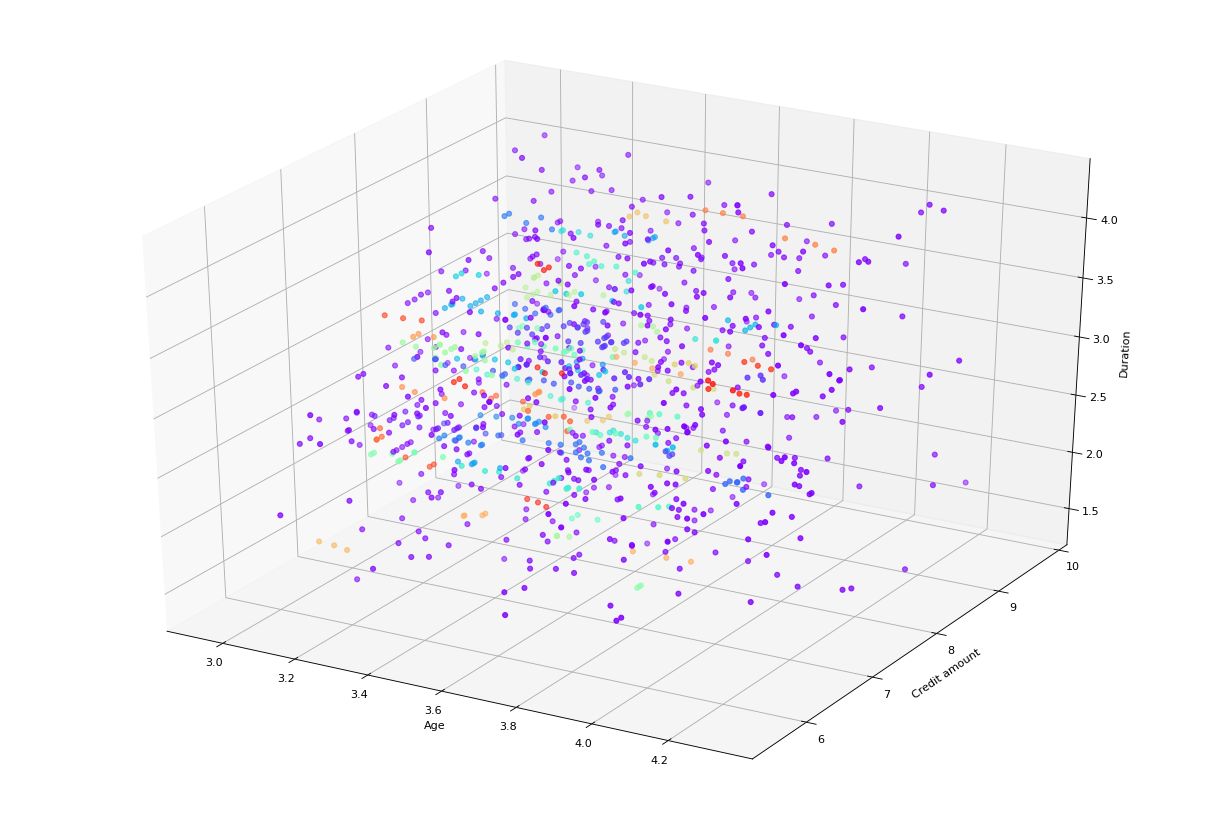

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(num = None, figsize = (15,10), dpi = 80, facecolor = 'w', edgecolor ='k')
#ax = plt.axes(prohection='3d')
ax = Axes3D(fig)
ax.scatter3D(X[:,0], X[:,1], X[:,2], c = dbscan.labels_, cmap = 'rainbow')
#ax.scatter3D(labels.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c = 'black')


xLabel = ax.set_xlabel('Age', linespacing = 3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing = 1.2)
zLabel = ax.set_zlabel('Duration', linespacing = 1.5)

In [44]:
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 73  0 -1 -1  1 12  1  2 -1  3  4 -1 -1  5 -1 -1 -1  6
  7 -1 -1 -1 -1 -1  8  9 -1 10 11 12 -1  8 -1 -1 -1 13 67 -1 -1 -1 23 -1
 -1 14  5 -1  1 15 -1 -1 -1 16  8 -1 17 -1 -1 -1 18 -1 14 -1 -1 24 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 19 20 -1 -1 -1 11 75 -1 21 13 -1 10 -1 -1 10 -1
 -1 22 23 -1  3 24 -1 -1 -1 -1 67 -1 25 69 -1 -1 -1 26 11 -1 -1  7 -1 27
 -1 28 -1 -1  8 14 29 -1 -1 30 -1 -1 31 -1 -1 11 -1 -1 -1  6 -1 32 -1 -1
 -1 -1 -1 33 32 34 -1 -1 -1 25 -1  1 -1 -1 -1 35  5 -1 36 -1 -1 -1 55 -1
  9 37 -1 38 37 -1 39 -1 -1 -1 14 -1 16 32 -1 -1 -1 -1 -1 -1 -1 15 -1 -1
 -1 77 -1 -1 60 -1  5 -1 -1 13 -1 -1 11 -1  6  1 -1 10 -1 -1 -1 -1 -1 -1
 15 -1 18 -1 40  1 29  5 -1 -1 -1 -1 -1 18 -1 -1 27 -1 41 37 -1 -1 11 -1
 42 -1 12 13 43 44 33 45 -1 -1 -1 51 -1 46 -1 -1  5 14 -1 -1 -1 74 -1 -1
 -1 -1  0  3 -1 -1 22 11 -1 -1 -1 -1 21 53 -1 37 -1 -1 -1 -1 46 66 12 57
 -1 -1 13 16 19 -1 65 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 29 -1 -1 -1 47
  9 40 -1 -1 29 -1 29 79 48 37  5 -1 55 -1 -1  3 32

Hasil dari DBSCAN dengan epsilon 0.09 dan min samples 3, terlihat bahwa DBSCAN tidak cocok untuk mengcluster data ini

In [45]:
####

### KESIMPULAN
Metode clustering terbaik pada kasus ini adalah dengan menggunakan clustering K-Means, dari hasil cluster maupun visualisasi data dapat dilihat resiko credit nya sehingga dapat diambil manfaat peneglompokkan kostumer berdasarkan pola perilakunya

In [46]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster (K-Means),Pay/Time,Cluster (Hierarchical)
0,67,male,3,own,little,little,1169,6,radio/TV,2,194.833333,2
1,22,female,3,own,little,moderate,5951,48,radio/TV,0,123.979167,1
2,49,male,2,own,little,little,2096,12,education,1,174.666667,0
3,45,male,3,free,little,little,7882,42,furniture/equipment,0,187.666667,1
4,53,male,3,free,little,little,4870,24,car,0,202.916667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,2,own,little,little,1736,12,furniture/equipment,2,144.666667,0
996,40,male,4,own,little,little,3857,30,car,0,128.566667,1
997,38,male,3,own,little,little,804,12,radio/TV,2,67.000000,2
998,23,male,3,free,little,little,1845,45,radio/TV,1,41.000000,0
